In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Inspect actions (portfolio weights)
Note: Backtest must be completed before insection of its actions can be done.

In [2]:
def make_int(x):
    try:
        if x.is_integer():
            x = int(x)
        return x
    except Exception as e:
        return x

In [3]:
def get_actions(market_name, model_base_name, gamma_trade, gamma_risk, gamma_hold, seed=0):
    return pd.read_csv(f'../experiments/{market_name}/seeded/{model_base_name}/seed_{seed}/trade_{gamma_trade}_risk_{gamma_risk}_hold_{gamma_hold}/actions.csv', index_col=0, parse_dates=True)

In [4]:
# papermill parameters
# specify which backtest to inspect
MARKET_NAME = 'DOW_30' # use either | 'DOW_30' | 'LA_40' | 'NIK_25' |
MODEL_BASE_NAME = 'RL_CNN' # use either | 'RL_CNN' | 'RL_str_fcast' | 'RL_all_inp' |
N = 20 # how many plots to make
SEED = 0 # don't change - backtests were only done for seed=0

In [5]:
# create directory to save action plots if it doesn't exist already
if not os.path.exists(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}'):
    os.makedirs(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}')

In [6]:
# see the possible gamma values to select from (these were all on the frontier for the given seed)
frontier_df = pd.read_csv(f'../experiments/{MARKET_NAME}/seeded/{MODEL_BASE_NAME}/backtests/{MARKET_NAME}_{MODEL_BASE_NAME}_seed_frontiers.csv')
frontier_df = frontier_df[frontier_df['seed']==SEED]
frontier_df = frontier_df.sort_values(by=['excess_risk', 'sharpe'], ascending=True)
frontier_df.head()

,gamma_trade,gamma_risk,gamma_hold,seed,excess_return,excess_risk,sharpe,is_pareto
0,0.1,1000.0,1000.0,0,2.382284,10.582631,0.225113,True
1,1.0,1000.0,1000.0,0,3.091943,10.656646,0.290142,True
2,10.0,1000.0,1000.0,0,3.491204,10.676415,0.327002,True
3,1000.0,10000.0,10000.0,0,4.379154,10.717976,0.408580,True
4,100.0,1000.0,1000.0,0,5.569284,10.839063,0.513816,True


In [7]:
# gamma_trade_list = [make_int(i) for i in list(frontier_df['gamma_trade'].round(3))]
# gamma_risk_list = [make_int(j) for j in list(frontier_df['gamma_risk'].round(3))]
# gamma_hold_list = [make_int(k) for k in list(frontier_df['gamma_hold'].round(3))]

# GAMMA_TRIOS = list(zip(gamma_trade_list, gamma_risk_list, gamma_hold_list))
# GAMMA_TRIOS

In [8]:
# get N risk brackets
risk_min = frontier_df['excess_risk'].min()
risk_max = frontier_df['excess_risk'].max()
risk_range = risk_max - risk_min
risk_jump = risk_range/N

print(f'min={risk_min} - max={risk_max}')
print(f'jump={risk_jump}')

risk_brackets = [( risk_min+(i*risk_jump) , risk_min+((i+1)*risk_jump) ) for i in range(N)]

min=10.582630546537708 - max=38.84010878393725
jump=1.412873911869977


In [9]:
# risk_brackets

In [10]:
frontier_df

,gamma_trade,gamma_risk,gamma_hold,seed,excess_return,excess_risk,sharpe,is_pareto
0,0.1,1000.0,1000.0,0,2.382284,10.582631,0.225113,True
1,1.0,1000.0,1000.0,0,3.091943,10.656646,0.290142,True
2,10.0,1000.0,1000.0,0,3.491204,10.676415,0.327002,True
3,1000.0,10000.0,10000.0,0,4.379154,10.717976,0.408580,True
4,100.0,1000.0,1000.0,0,5.569284,10.839063,0.513816,True
5,1.0,100.0,100.0,0,5.934145,11.264000,0.526824,True
6,10.0,100.0,100.0,0,7.161829,11.448264,0.625582,True
7,1000.0,1000.0,100.0,0,8.939403,11.751158,0.760725,True
8,100.0,100.0,100.0,0,9.577564,12.185746,0.785965,True
9,100.0,100.0,1.0,0,9.977371,12.635167,0.789651,True


[1/20]	bracket=(10.58, 12.0)
[2/20]	bracket=(12.0, 13.41)
[3/20]	bracket=(13.41, 14.82)
	no result for [4/20] index 0 is out of bounds for axis 0 with size 0
	no result for [5/20] index 0 is out of bounds for axis 0 with size 0
	no result for [6/20] index 0 is out of bounds for axis 0 with size 0
	no result for [7/20] index 0 is out of bounds for axis 0 with size 0
	no result for [8/20] index 0 is out of bounds for axis 0 with size 0
	no result for [9/20] index 0 is out of bounds for axis 0 with size 0
	no result for [10/20] index 0 is out of bounds for axis 0 with size 0
	no result for [11/20] index 0 is out of bounds for axis 0 with size 0
	no result for [12/20] index 0 is out of bounds for axis 0 with size 0
	no result for [13/20] index 0 is out of bounds for axis 0 with size 0
	no result for [14/20] index 0 is out of bounds for axis 0 with size 0
	no result for [15/20] index 0 is out of bounds for axis 0 with size 0
	no result for [16/20] index 0 is out of bounds for axis 0 with si

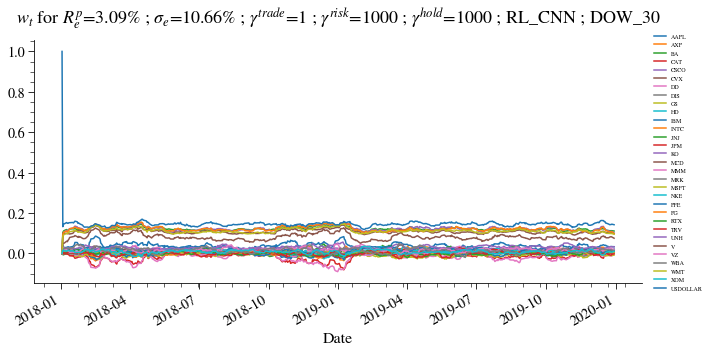

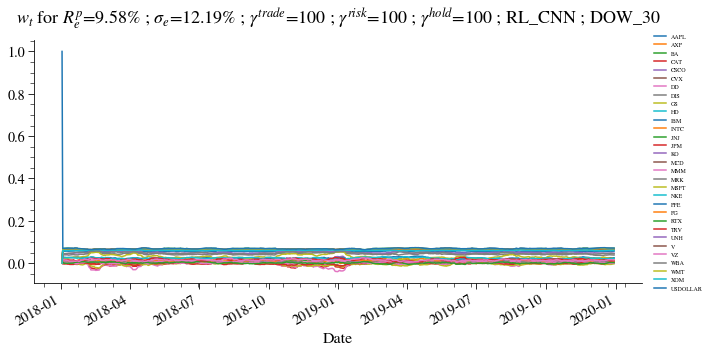

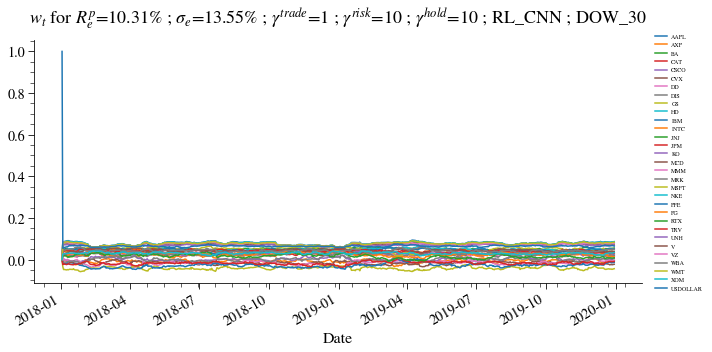

In [11]:
for n in range(N):
    try:
        #idx = (len(frontier_df)//N) * n 
        #GAMMA_TRADE, GAMMA_RISK = GAMMA_PAIRS[idx]
        #print(f'[{m+1}/{N}]\tidx={idx}\tgammas=({GAMMA_TRADE}, {GAMMA_RISK})')
        
        bracket = risk_brackets[n]
        result = frontier_df[(frontier_df['excess_risk']>bracket[0]) & \
                             (frontier_df['excess_risk']<bracket[1])].head(1)
        ret = result['excess_return'].values[0]
        risk = result['excess_risk'].values[0]
        
        GAMMA_TRADE = make_int(result['gamma_trade'].values[0])
        GAMMA_RISK = make_int(result['gamma_risk'].values[0])
        GAMMA_HOLD = make_int(result['gamma_hold'].values[0])

        rl_actions = get_actions(market_name=MARKET_NAME, 
                                 model_base_name=MODEL_BASE_NAME, 
                                 gamma_trade=GAMMA_TRADE, 
                                 gamma_risk=GAMMA_RISK, 
                                 gamma_hold=GAMMA_HOLD, 
                                 seed=SEED)

        print(f'[{n+1}/{N}]\tbracket=({round(bracket[0],2)}, {round(bracket[1],2)})')

        #result = frontier_df[(frontier_df['gamma_trade']==GAMMA_TRADE) & \
        #                  (frontier_df['gamma_risk']==GAMMA_RISK) & \
        #                  (frontier_df['seed']==SEED)]
        

        plot_title = '$w_t$ for $R^p_e$='+f'{round(ret,2)}% ; '+ \
                    '$\sigma_e$='+f'{round(risk,2)}% ; '+\
                    '$\gamma^{trade}$='+f'{GAMMA_TRADE} ; '+\
                    '$\gamma^{risk}$='+f'{GAMMA_RISK} ; '+\
                    '$\gamma^{hold}$='+f'{GAMMA_HOLD} ; '+\
                    f'{MODEL_BASE_NAME} ; {MARKET_NAME}'

        rl_actions.plot(legend=False, figsize=(10,5), title=plot_title)
        plt.legend(bbox_to_anchor=(1.11, 1.05), prop={'size': 6})
        plt.savefig(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}/{n}.png') #_risk_{GAMMA_RISK}_trade_{GAMMA_TRADE}.png')
        
    except Exception as e:
        print(f'\tno result for [{n+1}/{N}]', e)

In [12]:
rl_actions

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,USDOLLAR
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2018-01-03,0.083897,-0.001272,0.081395,0.041521,-0.003023,-0.015042,0.000773,-0.008665,-0.034674,0.083783,...,0.021129,0.025164,0.040402,0.065618,0.024398,0.084513,0.043232,0.082392,0.026560,0.053940
2018-01-04,0.085695,0.000082,0.082735,0.037794,0.002670,-0.020919,-0.000567,-0.010301,-0.047840,0.084391,...,0.021716,0.019795,0.039773,0.070510,0.025899,0.084054,0.045702,0.081182,0.026924,0.056312
2018-01-05,0.086728,-0.003503,0.083665,0.038365,0.001999,-0.018770,-0.002068,-0.012241,-0.047511,0.085008,...,0.021917,0.018824,0.042554,0.070739,0.026279,0.083410,0.044616,0.082668,0.027335,0.058192
2018-01-08,0.089852,-0.007736,0.085379,0.035520,-0.003824,-0.020603,-0.001746,-0.012360,-0.049672,0.088089,...,0.019016,0.017335,0.043626,0.070830,0.027578,0.084571,0.049023,0.085465,0.029240,0.061273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.083857,-0.009935,0.078460,0.037446,-0.003342,-0.022434,-0.003403,0.004465,-0.044307,0.084052,...,0.015048,0.008157,0.029842,0.066445,0.037296,0.078289,0.048125,0.081080,0.031910,0.066568
2019-12-24,0.083131,-0.009093,0.079124,0.039977,-0.001877,-0.025468,-0.005559,0.005123,-0.045771,0.083685,...,0.013282,0.008320,0.029665,0.067669,0.039576,0.078103,0.049320,0.081045,0.032451,0.065822
2019-12-26,0.083229,-0.007635,0.078509,0.035762,-0.001003,-0.023072,-0.006712,0.004306,-0.045424,0.083488,...,0.016303,0.008352,0.029011,0.067809,0.040207,0.077404,0.048592,0.080239,0.031480,0.066716


In [13]:
print('done.')

done.
